In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

df = pd.read_csv("data.csv").drop("Unnamed: 0", axis=1)

In [27]:
#examine the first few rows
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000,71,1136000,159000,0.72,818000,1998
1,AZ,55000,60,3300000,1485000,0.64,2112000,1998
2,AR,53000,65,3445000,1688000,0.59,2033000,1998
3,CA,450000,83,37350000,12326000,0.62,23157000,1998
4,CO,27000,72,1944000,1594000,0.70,1361000,1998


In [28]:
#get the mean of production per year
prod_per_year = df.groupby("year").totalprod.mean().reset_index()
prod_per_year

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06
5,2003,4.122091e+06
6,2004,4.456805e+06
7,2005,4.243146e+06
8,2006,3.761902e+06
9,2007,3.600512e+06


In [29]:
#define X
X = prod_per_year.year

#reshape as a 1D array
X = X.values.reshape(-1, 1)

In [30]:
#define y
y = prod_per_year.totalprod

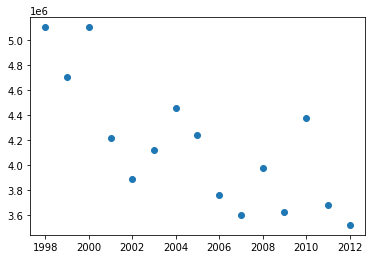

In [31]:
#plot x, y as a scatter plot
plt.scatter(X, y)
plt.show()

In [33]:
#create liner regression model
regr = linear_model.LinearRegression()

In [35]:
#fit the model
regr.fit(X, y)

#print coefficient and intercept
print(regr.coef_, regr.intercept_)

[-88303.18915238] 181208083.1073298


In [36]:
#create a list of y predicted values
y_predict = regr.predict(X)

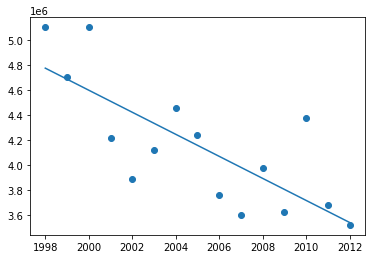

In [37]:
#plot predicted y values with X from the model
plt.scatter(X, y)
plt.plot(X, y_predict)
plt.show()

In [39]:
#create an array of X future values
X_future = np.array(range(2013, 2050))
X_future = X_future.reshape(-1, 1)

In [41]:
#create y values for future predictions
future_predict = regr.predict(X_future)

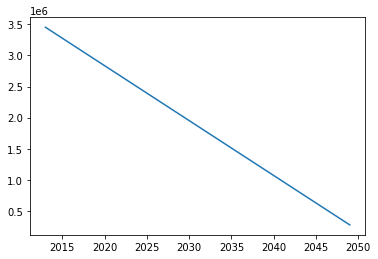

In [42]:
#plot line to see predictions of production into the future
plt.plot(X_future, future_predict)
plt.show()